In [1]:
import os

root = "../out"

files = [
    os.path.join(root, dir, subdir, file)
    for dir in os.listdir(root)
    if ".DS_Store" not in dir
    for subdir in os.listdir(os.path.join(root, dir))
    if ".DS_Store" not in subdir
    for file in os.listdir(os.path.join(root, dir, subdir))
    if ".DS_Store" not in file
]

In [2]:
len(files)

14440

In [3]:
import torchaudio
from speechbrain.inference.speaker import EncoderClassifier

classifier = EncoderClassifier.from_hparams(
    source="speechbrain/spkrec-ecapa-voxceleb", run_opts={"device": "cuda"}
)


def inference(file):
    signal, fs = torchaudio.load(file)
    embeddings = classifier.encode_batch(signal)
    return embeddings[0][0]

In [4]:
speaker_matrix = [inference(file) for file in files]

In [5]:
import umap as umap

matrix = [tensor.cpu() for tensor in speaker_matrix]

embedding = umap.UMAP(n_components=2, metric="euclidean").fit(matrix)

/home/ansel/.pyenv/versions/3.12.3/lib/python3.12/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/ansel/.pyenv/versions/3.12.3/lib/python3.12/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/home/ansel/.pyenv/versions/3.12.3/lib/python3.12/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signatur

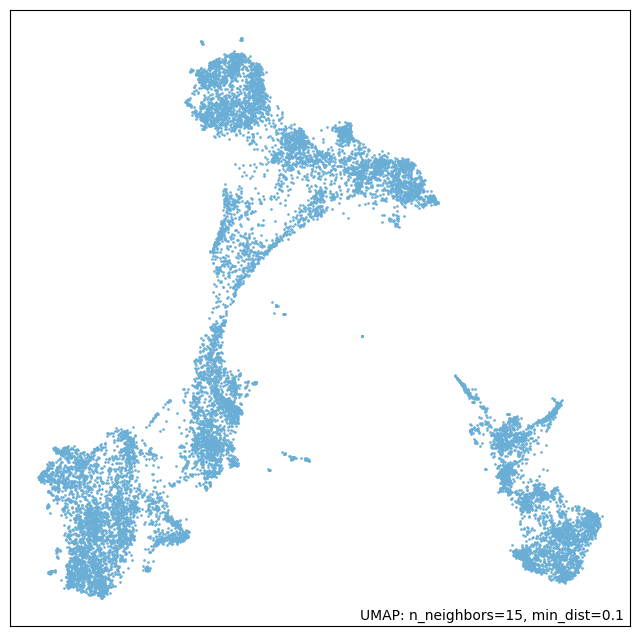

In [6]:
import umap.plot

f = umap.plot.points(embedding)